In [24]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [25]:
label_preds = pd.read_csv(r'Label_preds.csv')
label_preds

,0
0,0
1,2
2,5
3,3
4,2
...,...
1167,1
1168,5
1169,0
1170,1


In [26]:
vir_data = pd.read_csv(r'DH2-1024.csv')
vir_data

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-0.136684,-0.253293,-0.084531,-0.258148,-0.206584,-0.136114,-0.298800,-0.183208,-0.177439,-0.404484,...,0.003829,-0.019146,0.368959,-0.022658,0.110902,0.422643,0.252644,0.280236,0.342342,0.308506
1,0.272284,0.197765,0.356625,0.084793,0.586485,0.186568,0.369831,0.296610,0.170298,0.331071,...,-0.345941,-0.176470,-0.438550,-0.439555,-0.298906,-0.260701,-0.321565,-0.354799,-0.083213,-0.177426
2,-0.313560,-0.150184,-0.183430,-0.088949,0.105067,-0.099280,0.060925,0.212390,-0.054750,0.326948,...,-0.042690,-0.502987,0.003397,-0.290266,-0.300571,-0.193960,-0.345596,-0.277201,-0.275358,-0.291779
3,-0.338411,-0.173913,-0.414642,-0.365720,-0.337661,-0.585315,-0.394475,-0.427417,-0.495976,-0.466941,...,0.540927,0.591470,0.398526,0.350225,0.432531,0.459899,0.198879,0.462843,0.364059,0.283559
4,0.265651,0.272247,0.393065,0.361609,0.174034,0.215036,0.157110,0.141896,-0.061382,0.002589,...,-0.217535,-0.161283,-0.102723,-0.105368,0.103495,0.000523,-0.118287,0.118529,0.054463,-0.005959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167,-0.069302,-0.129607,0.021673,-0.017954,-0.046373,-0.019340,0.251703,0.116944,0.003715,0.214078,...,-0.254476,-0.263332,-0.116898,-0.393128,-0.213978,-0.158594,-0.181446,-0.142316,-0.209668,-0.233492
1168,-0.028584,-0.138641,-0.242603,-0.225048,-0.091343,-0.350796,-0.208954,-0.190251,0.023345,0.049510,...,-0.121166,0.094473,0.039696,0.041541,-0.134040,-0.111330,-0.149663,-0.069755,-0.014714,-0.194260
1169,-0.081726,-0.084530,-0.190040,-0.198831,-0.195958,-0.179429,-0.165196,-0.454995,-0.297777,-0.323262,...,-0.308497,-0.143583,-0.102642,-0.153342,-0.199791,-0.197204,-0.215573,-0.127087,-0.316064,-0.258211
1170,-0.363521,-0.149458,-0.350797,-0.289129,-0.202861,-0.209835,-0.393116,-0.293816,-0.290478,-0.419138,...,-0.246516,-0.319653,-0.044006,-0.221239,-0.021814,-0.126022,-0.029990,0.191529,-0.239226,0.174568


In [27]:
# Gộp nhãn từ label_preds vào vir_data
vir_data_with_labels = vir_data.copy()
vir_data_with_labels['label'] = label_preds.values

# Reshape dữ liệu để phù hợp với model DH1
data_array = vir_data_with_labels.values

In [28]:

%pip install tensorflow

from tensorflow.keras.models import load_model
from Model_pipeline import NormalizeLayer, MultiheadAttentionLayer, FeedForwardLayer, MultiheadAttentionLayerWrapper
import time

custom_objects = {
    'NormalizeLayer': NormalizeLayer,
    'MultiheadAttentionLayer': MultiheadAttentionLayer,
    'FeedForwardLayer': FeedForwardLayer,
    'MultiheadAttentionLayerWrapper': MultiheadAttentionLayerWrapper
}

loaded_model = load_model('DH1_model.keras', custom_objects=custom_objects)


Note: you may need to restart the kernel to use updated packages.


c:\Users\Hi Windows 11 Home\anaconda3\envs\SOTA\Lib\site-packages\keras\src\layers\layer.py:395: UserWarning: `build()` was called on layer 'multihead_attention_layer_wrapper', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
c:\Users\Hi Windows 11 Home\anaconda3\envs\SOTA\Lib\site-packages\keras\src\layers\layer.py:395: UserWarning: `build()` was called on layer 'multihead_attention_layer_wrapper_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
c:\Users\Hi Windows 11 Home\anaconda3\envs\SOTA\Lib\site-p

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf

# Sử dụng train_test_split để chia dữ liệu thành train và test
train_data, test_data, train_labels, test_labels = train_test_split(
    vir_data, label_preds.values, test_size=0.3, random_state=42
)

# Chuyển đổi DataFrame thành mảng NumPy và reshape theo định dạng mô hình yêu cầu: (None, 8, 128)
train_data = train_data.to_numpy().reshape(-1, 8, 128)
test_data = test_data.to_numpy().reshape(-1, 8, 128)

# Dự đoán nhãn cho dữ liệu train
train_predictions = loaded_model(train_data)
train_predictions = tf.argmax(train_predictions, axis=1).numpy()

# Dự đoán nhãn cho dữ liệu test
test_predictions = loaded_model(test_data, training=False)
test_predictions = tf.argmax(test_predictions, axis=1).numpy()

# Tính accuracy và confusion matrix cho dữ liệu test
accuracy = accuracy_score(test_labels, test_predictions)
conf_matrix = confusion_matrix(test_labels, test_predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.13636363636363635
Confusion Matrix:
 [[ 0  0  0  0  0 60]
 [ 0  0  0  0  0 60]
 [ 0  0  0  0  0 61]
 [ 0  0  0  0  0 68]
 [ 0  0  0  0  0 55]
 [ 0  0  0  0  0 48]]


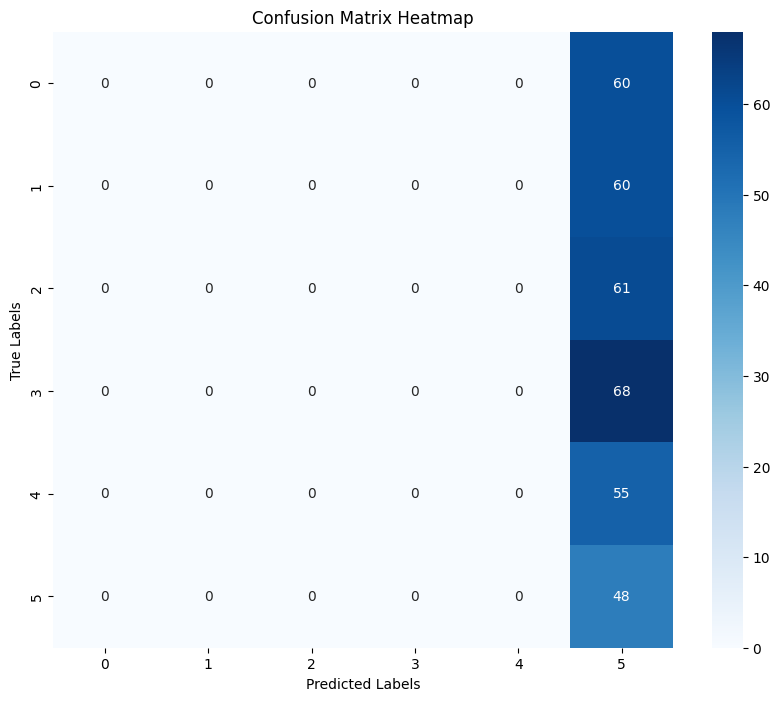

In [30]:
import seaborn as sns

import matplotlib.pyplot as plt

# Vẽ confusion matrix dưới dạng heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()